In [1]:
library(correlation)

## Q1. Delivery Time Dataset
A soft drink bottler is analysing the vending machine service routes in his distribution system. He is interested in predicting the amount of time required by the route driver to service the vending machines in an outlet. This service activity includes stocking the machine with beverage products and minor maintenance or housekeeping. The industrial engineer responsible for the study has suggested that the two most important variables affecting the delivery time are the number of cases of product stocked and the distance walked by the route driver. The engineer has collected 25 observations on delivery time which are given in the excel file.<br>
Y : Delivery Time (min)<br>
X1 : Number of Cases<br>
X2 : Distance (ft)<br>

In [2]:
delivery_data = read.csv('deliverytime - Sheet1.csv')

In [3]:
head(delivery_data)

,Y,X1,X2
,<dbl>,<int>,<int>
1,16.68,7,560
2,11.50,3,220
3,12.03,3,340
4,14.88,4,80
5,13.75,6,150
6,18.11,7,330


In [4]:
cor(delivery_data)

,Y,X1,X2
Y,1.0000000,0.9646146,0.8916701
X1,0.9646146,1.0000000,0.8242150
X2,0.8916701,0.8242150,1.0000000


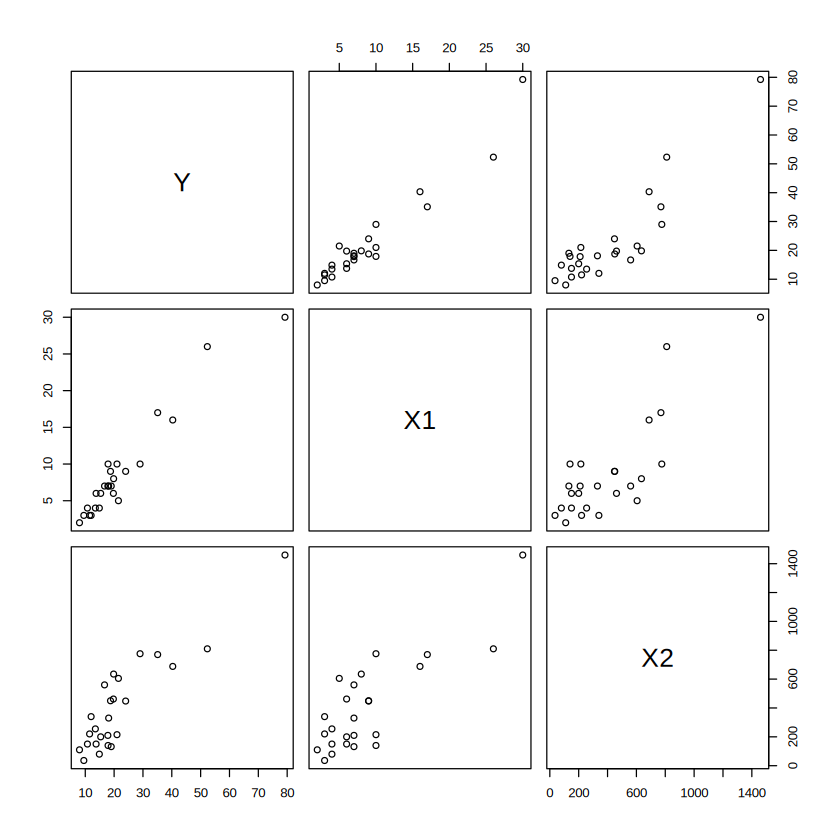

In [5]:
pairs(delivery_data)

In [6]:
reg_mod = lm('Y ~ X1 + X2',data=delivery_data)

In [7]:
reg_mod


Call:
lm(formula = "Y ~ X1 + X2", data = delivery_data)

Coefficients:
(Intercept)           X1           X2  
    2.34123      1.61591      0.01438  


In [8]:
summary(reg_mod)


Call:
lm(formula = "Y ~ X1 + X2", data = delivery_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.7880 -0.6629  0.4364  1.1566  7.4197 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.341231   1.096730   2.135 0.044170 *  
X1          1.615907   0.170735   9.464 3.25e-09 ***
X2          0.014385   0.003613   3.981 0.000631 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.259 on 22 degrees of freedom
Multiple R-squared:  0.9596,	Adjusted R-squared:  0.9559 
F-statistic: 261.2 on 2 and 22 DF,  p-value: 4.687e-16


- The model is Y = 1.615907X<sub>1</sub> + 0.014385X<sub>2</sub> + 2.341231
<br>where Y is delivery time in mins X<sub>1</sub> is number of cases and X<sub>2</sub> is the Distance in ft.
- β<sub>1</sub> = 1.615907, this means that one unit increase in X<sub>1</sub> i.e number of cases will increase delivery time by 1.615907 mins.
- β<sub>2</sub> = 0.014385, this means that one unit increase in X<sub>2</sub> i.e distance will increase delivery time by 0.014385 mins.
- The average delivery time is 2.341231 mins when cases and distance (independent variables) is zero, but this is not possible and maybe due to the presence of multicollinearity in the data. We will have to retrain the model.

### Checking for significance of regression
H<sub>o</sub>: β<sub>1</sub> = β<sub>2</sub> = 0 <br>
H<sub>1</sub>: β<sub>1</sub> != β<sub>2</sub> != 0 <br>
The p-value of thhe overall model is 4.687e<sup>-16</sup> which is less than 0.05, therefore we can reject the null hypothesis. Hence β<sub>1</sub> != β<sub>2</sub> != 0 <br>
From the output we can see that the p-value for β<sub>0</sub> is 0.044170 β<sub>1</sub> is 3.25e<sup>-09</sup> and β<sub>2</sub> is 0.000631. Therefore β<sub>0</sub>, β<sub>1</sub> and β<sub>2</sub> are significant.
Coefficient of determination is 0.9596 i.e 95.96% variation of Y is explained by X<sub>1</sub> and X<sub>2</sub>. Adjusted R<sup>2</sup> is 0.9559

In [9]:
confint(reg_mod,level=0.95)

,2.5 %,97.5 %
(Intercept),0.066751987,4.61571030
X1,1.261824662,1.96998976
X2,0.006891745,0.02187791


In [10]:
num_cases_inp = as.numeric(readline('Enter the number of cases: '))

Enter the number of cases:  5


In [11]:
distance_inp = as.numeric(readline('Enter the distance in ft: '))

Enter the distance in ft:  500


In [12]:
paste0('For ',num_cases_inp, ' number of cases and distance of ',distance_inp,
    ' ft the time taken for the delivery is predicted to be ',
    predict(reg_mod,newdata = data.frame(X1 = c(num_cases_inp),X2=c(distance_inp))), ' mins.')

[1] "For 5 number of cases and distance of 500 ft the time taken for the delivery is predicted to be 17.6131803260125 mins."

### Fitted Values

In [13]:
predict(reg_mod)

1         2         3         4         5         6         7         8 
21.708084 10.353615 12.079794  9.955646 14.194398 18.399574  7.155376 16.673395 
        9        10        11        12        13        14        15        16 
71.820294 19.123587 38.092507 21.593041 12.472991 18.682464 23.328798 29.662928 
       17        18        19        20        21        22        23        24 
14.913640 15.551379  7.706807 40.887970 20.514179 56.006528 23.357568 24.402854 
       25 
10.962584

### Residuals

In [14]:
reg_mod$residuals

1          2          3          4          5          6          7 
-5.0280843  1.1463854 -0.0497937  4.9243539 -0.4443983 -0.2895743  0.8446235 
         8          9         10         11         12         13         14 
 1.1566049  7.4197062  2.3764129  2.2374930 -0.5930409  1.0270093  1.0675359 
        15         16         17         18         19         20         21 
 0.6712018 -0.6629284  0.4363603  3.4486213  1.7931935 -5.7879699 -2.6141789 
        22         23         24         25 
-3.6865279 -4.6075679 -4.5728535 -0.2125839

### Testing for autocorrelation
Using the Durbin Watson test
- H<sub>o</sub>: There is no autocorrelation in the residuals
- H<sub>11</sub>: There is autocorrelation in the residuals

```R
dwtest(reg_mod,alternative='two.sided')
```

![image](2024-03-19-215044_928x262_scrot.png)

The p-value is 0.02403, which is less than our LOS of 5%. Therefore we can reject the null hypothesis, hence there is autocorrelation present in the residuals

### Testing for Heteroscedasticity
Using the Breusch-Pagan-Godfrey test
- H<sub>o</sub>: There is no heteroscedasticity in the residuals
- H<sub>1</sub>: There is heteroscedasticity in the residuals

```R
bptest(reg_mod)
```

![image](2024-03-19-215801_720x211_scrot.png)

The p-value is 0.002493, which is less than our LOS of 5%. Therefore we can reject the null hypothesis, hence there is heteroscedasticity in the residuals

-----

## Q2 Mammals Data
Data are from American Naturalist (1974) p.593-613. Animals have
properties that make them better capable of living and multiplying. One expects that
larger brain may be generally better. But there can be penalties and limitations. One
limitation is need for longer pregnancy and the other is the need to have fewer
offsprings.

In [15]:
mammals_df = read.csv('mammalsize - Sheet1.csv')

In [16]:
head(mammals_df)

,species.name,gestation.period..days.,brain.weight..gms.,body.weight.kg.,av..Litter.size
,<chr>,<int>,<dbl>,<dbl>,<dbl>
1,Quokka,26,17.50,3.50,1.0
2,hedgehog,34,3.50,0.93,4.6
3,tree shrew,46,3.15,0.15,3.0
4,elephant shrew1,51,1.14,0.05,1.5
5,elephant shrew2,46,1.37,0.06,1.5
6,lemur,135,22.00,2.10,1.0


In [17]:
cor(mammals_df[,2:length(mammals_df)])

,gestation.period..days.,brain.weight..gms.,body.weight.kg.,av..Litter.size
gestation.period..days.,1.0000000,0.7281915,0.6246744,-0.6037515
brain.weight..gms.,0.7281915,1.0000000,0.8640269,-0.2545611
body.weight.kg.,0.6246744,0.8640269,1.0000000,-0.1827372
av..Litter.size,-0.6037515,-0.2545611,-0.1827372,1.0000000


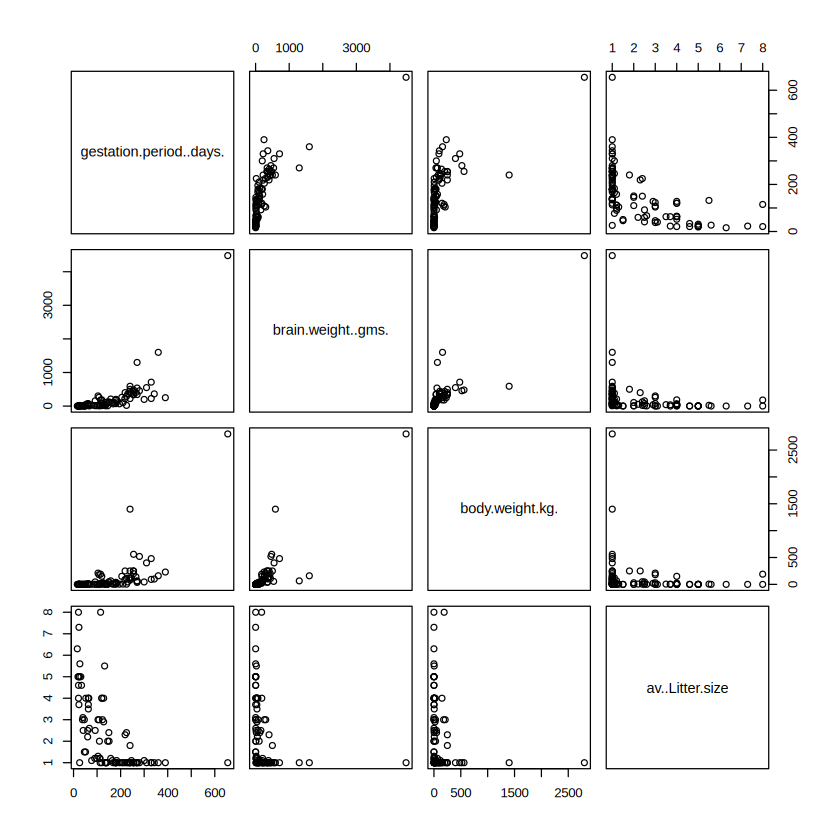

In [18]:
pairs(mammals_df[,2:length(mammals_df)])

In [19]:
mammals_reg_mod = lm('gestation.period..days. ~ brain.weight..gms. + body.weight.kg. + av..Litter.size',data=mammals_df)

In [20]:
summary(mammals_reg_mod)


Call:
lm(formula = "gestation.period..days. ~ brain.weight..gms. + body.weight.kg. + av..Litter.size", 
    data = mammals_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-135.448  -38.675   -4.416   38.083  196.613 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        187.05056   11.04951  16.928  < 2e-16 ***
brain.weight..gms.   0.12197    0.02390   5.103 1.79e-06 ***
body.weight.kg.      0.01581    0.03618   0.437    0.663    
av..Litter.size    -27.79183    3.55161  -7.825 8.31e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 58.31 on 92 degrees of freedom
Multiple R-squared:  0.718,	Adjusted R-squared:  0.7088 
F-statistic: 78.09 on 3 and 92 DF,  p-value: < 2.2e-16


- The model is Y = 0.12197X<sub>1</sub> + 0.01581X<sub>2</sub> - 27.79183X<sub>3</sub> + 187.05056
<br>where Y is gestation period in days X<sub>1</sub> is brain weight in gms and X<sub>2</sub> is the body weight in kg and X<sub>3</sub> is the average litter size.
- β<sub>1</sub> = 0.12197, this means that one unit increase in X<sub>1</sub> i.e brain weight will increase gestation period by 0.12197 days.
- β<sub>2</sub> = 0.01581, this means that one unit increase in X<sub>2</sub> i.e body weight will increase gestation period by 0.01581 days.
- β<sub>3</sub> = - 27.79183, this means that one unit increase in X<sub>3</sub> i.e average litter size will decrease gestation period by 27.79183 days.
- The average gestation period is 187.05056 days when all independent variables are zero. We should check for the assumptions of a linear regression model and retrain if required.

### Checking for significance of regression
H<sub>o</sub>: β<sub>1</sub> = β<sub>2</sub> = β<sub>3</sub> = 0 <br>
H<sub>1</sub>: β<sub>1</sub> != β<sub>2</sub> != β<sub>3</sub> != 0 <br>
The p-value of thhe overall model is < 2.2e<sup>-16</sup> which is less than 0.05, therefore we can reject the null hypothesis. Hence β<sub>1</sub> != β<sub>2</sub> != β<sub>2</sub> != 0 <br>
From the output we can see that the p-value for β<sub>0</sub> is < 2e<sup>-16</sup> β<sub>1</sub> is 1.79e<sup>-06</sup>, β<sub>2</sub> is 0.663 and β<sub>3</sub> is 8.31e<sup>-12</sup>. Therefore β<sub>0</sub>, β<sub>1</sub> and β<sub>3</sub> are significant, but β<sub>2</sub> is not significant.<br>
Coefficient of determination is 0.718 i.e 71.8% variation of Y is explained by X<sub>1</sub>, X<sub>2</sub> and X<sub>3</sub>. Adjusted R<sup>2</sup> is 0.7088

In [21]:
confint(mammals_reg_mod,level=0.95)

,2.5 %,97.5 %
(Intercept),165.10528330,208.9958431
brain.weight..gms.,0.07449663,0.1694355
body.weight.kg.,-0.05604809,0.0876705
av..Litter.size,-34.84562139,-20.7380310


In [22]:
predict(mammals_reg_mod)

1         2         3         4         5         6         7         8 
161.44848  59.64975 104.06165 145.50266 145.53087 161.97519 155.28051 160.47727 
        9        10        11        12        13        14        15        16 
165.96665 168.22076 173.30675 172.67478 132.42172 169.67193 169.66748 181.91056 
       17        18        19        20        21        22        23        24 
181.59662 167.50319 167.33922 171.78624 201.67811 203.87802 210.99053 318.84235 
       25        26        27        28        29        30        31        32 
 77.40535  49.29709 119.23900 104.44015 101.12721 111.64913  81.76701  84.30422 
       33        34        35        36        37        38        39        40 
 48.16875  48.15517  48.17591  59.29051  12.10072  76.01105 -15.74116 -34.98839 
       41        42        43        44        45        46        47        48 
 48.14663  31.56263 158.38704 158.43447 162.29028 115.32917 113.41884 153.44137 
       49        50        51        52        53        54        55        56 
154.92017 132.11403  37.07979 356.93423 225.63994  84.57967  81.83250  88.83022 
       57        58        59        60        61        62        63        64 
 79.40989 175.86859 201.96111  94.93676 160.31652 132.46761  79.38662 126.90819 
       65        66        67        68        69        70        71        72 
137.44699 138.23228 143.82919 206.50949 205.11354 214.90697 232.66455 749.93808 
       73        74        75        76        77        78        79        80 
122.91057 253.68795 193.38683 100.81866 -10.32603 253.35440 193.34159 188.17154 
       81        82        83        84        85        86        87        88 
181.34034 171.85633 187.72207 187.37650 215.47622 205.67370 205.08990 196.12420 
       89        90        91        92        93        94        95        96 
226.65672 203.94820 223.09709 170.80713 184.26859 180.35678 136.37069 144.86965

In [23]:
mammals_reg_mod$residuals

1            2            3            4            5            6 
-135.4484823  -25.6497484  -58.0616494  -94.5026558  -99.5308661  -26.9751940 
           7            8            9           10           11           12 
 -65.2805108  -25.4772689  -26.9666508   11.7792388  -33.3067504  -32.6747844 
          13           14           15           16           17           18 
  12.5782754    5.3280666   -4.6674809   -1.9105623   -1.5966212   27.4968051 
          19           20           21           22           23           24 
   0.6607807   38.2137627   68.3218879   26.1219752   54.0094720  -48.8423508 
          25           26           27           28           29           30 
  42.5946473  -18.2970911  -78.2389989  -66.4401509  -61.1272084   16.3508661 
          31           32           33           34           35           36 
  46.2329886  -61.3042175  -25.1687452  -24.1551708  -24.1759050  -38.2905124 
          37           38           39           40           41           42 
   3.8992844  -55.0110518   38.7411619   55.9883913  -29.1466332   -4.5626282 
          43           44           45           46           47           48 
 -46.3870394  -46.4344730  -49.2902765  -48.3291667    9.5811583  -49.4413716 
          49           50           51           52           53           54 
 -56.9201685  -22.1140315   94.9202053    3.0657653   44.3600583  -21.5796715 
          55           56           57           58           59           60 
 -29.8324968  -25.8302231  -14.4098871   43.1314103   38.0388906  -31.9367592 
          61           62           63           64           65           66 
 -83.3165180  -72.4676143  -16.3866227  -66.9081871  -45.4469853  -30.2322780 
          67           68           69           70           71           72 
 -39.8291889   47.4905092  137.8864609   25.0930297   77.3354461  -94.9380769 
          73           74           75           76           77           78 
 102.0894328   76.3120473  196.6131702   19.1813391  125.3260262  -13.3543981 
          79           80           81           82           83           84 
  11.6584056  141.8284564  118.6596605   11.1436742   52.2779342   30.6234976 
          85           86           87           88           89           90 
  39.5237840   29.3263048   40.9100982   28.8758038   28.3432785   51.0517966 
          91           92           93           94           95           96 
  56.9029121  -50.8071267   -4.2685870  -22.3567849   13.6293126    6.1303502

### Testing for autocorrelation
Using the Durbin Watson test
- H<sub>o</sub>: There is no autocorrelation in the residuals
- H<sub>11</sub>: There is autocorrelation in the residuals

```R
dwtest(mammals_reg_mod,alternative='two.sided')
```

![image](2024-03-19-223352_896x236_scrot.png)

The p-value is 5.071e<sup>-5</sup> which is less than our LOS of 5%. Therefore we can reject the null hypothesis, hence there is autocorrelation in the residuals.

### Testing for Heteroscedasticity
Using the Breusch-Pagan-Godfrey test
- H<sub>o</sub>: There is no heteroscedasticity in the residuals
- H<sub>1</sub>: There is heteroscedasticity in the residuals

```R
bptest(mammals_reg_mod)
```

![image](2024-03-19-223948_680x208_scrot.png)

The p-value is 0.6324 which is greater than our LOS of 5%. Therefore we do not reject the null hypothesis and hence there's no heteroscedasticity in the residuals